# Lidar 3D Ground Classification 

We provide an aerial LIDAR scan (input.las). The goal is to classify ground points. The aim is not 100% accuracy or Deep Learning based approaches, a “quick and dirty” solution suffices.

Recommended tools:
* Point cloud processing
* Laspy
* Pdal
* Scikit

Visualization:
* Potree
* Pptk
* Open3d
* CloudCompare


# Dirty Solution: z-axis filtering

In [ ]:
import laspy
import numpy as np
import open3d as o3d
import matplotlib.pyplot as plt

In [ ]:
# Load the LIDAR data
input_file = "./input.las"
las = laspy.read(input_file)
points = las.points

Z values range from 45.28 to 88.09


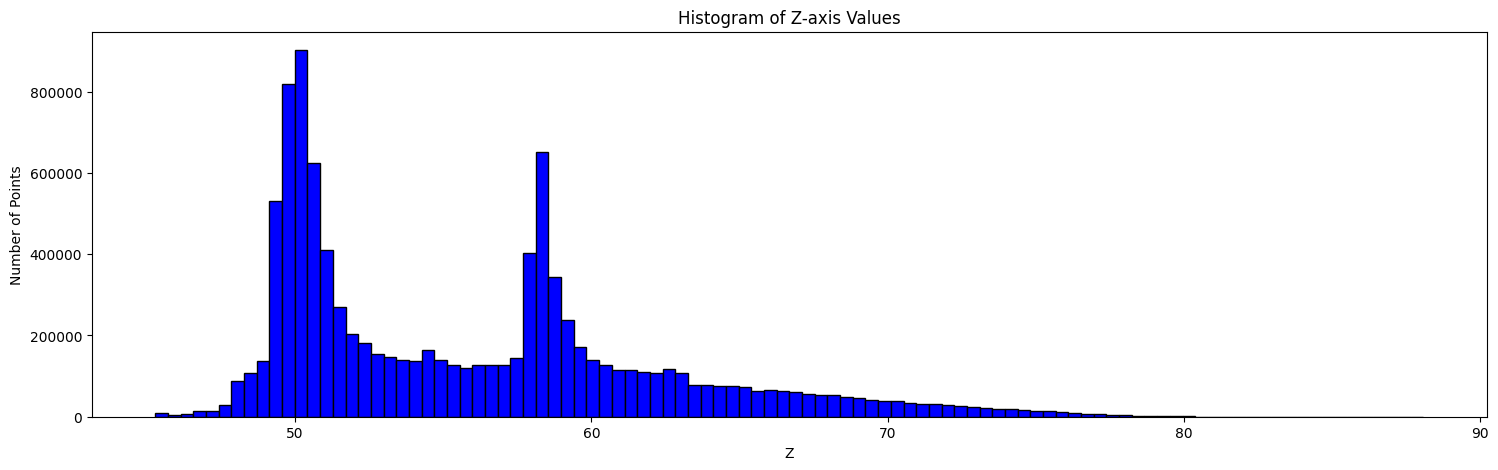

In [ ]:
# Extract X, Y, Z values
x = las.x
y = las.y
z = las.z

# Print the range of X, Y, Z values
print(f"Z values range from {np.min(z)} to {np.max(z)}")

# Create histograms for X, Y, Z values to inspect distributions
plt.figure(figsize=(18, 5))

plt.hist(z, bins=100, color='blue', edgecolor='black')
plt.title('Histogram of Z-axis Values')
plt.xlabel('Z')
plt.ylabel('Number of Points')

plt.show()


In [ ]:
# Identify the ground Z-value range from the histogram
ground_z_min = np.min(z)
ground_z_max = 51.3  # Adjust this value based on histogram observation

# Filter points within the ground Z-value range
ground_points_mask = (z >= ground_z_min) & (z <= ground_z_max)
ground_points = np.vstack((x[ground_points_mask], y[ground_points_mask], z[ground_points_mask])).transpose()

# Verify the number of points before and after filtering
print(f"Total points: {len(x)}")
print(f"Ground points: {len(ground_points)}")

# Create and visualize the ground points using Open3D
pcd_ground = o3d.geometry.PointCloud()
pcd_ground.points = o3d.utility.Vector3dVector(ground_points)

# Create and visualize all points using Open3D
all_points = np.vstack((x, y, z)).transpose()
pcd_all = o3d.geometry.PointCloud()
pcd_all.points = o3d.utility.Vector3dVector(all_points)

# Visualize all points
print("Visualizing all points")
o3d.visualization.draw_geometries([pcd_all])

# Visualize ground points
print("Visualizing ground points")
o3d.visualization.draw_geometries([pcd_ground])

Z values range from 45.28 to 88.09
Total points: 10103120
Ground points: 3720186
Visualizing all points
[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display
[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display
Visualizing ground points
[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display
[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display


# Good solution: PDAL

More details in README.txt

In [7]:
import open3d as o3d
import laspy
import numpy as np
import matplotlib.pyplot as plt

# Read the ground points LIDAR data
las = laspy.read("ground_points.las")
points = np.vstack((las.x, las.y, las.z)).transpose()

# Normalize the z-values for coloring
z_min = points[:, 2].min()
z_max = points[:, 2].max()
z_norm = (points[:, 2] - z_min) / (z_max - z_min)

# Create a color map
cmap = plt.get_cmap("viridis")
colors = cmap(z_norm)[:, :3]  # Use only RGB values, discard alpha

# Function to visualize points using open3d
def visualize_points(points, colors):
    pcd = o3d.geometry.PointCloud()
    pcd.points = o3d.utility.Vector3dVector(points)
    pcd.colors = o3d.utility.Vector3dVector(colors)
    return pcd

# Visualize ground points with color mapping based on height
ground_pcd = visualize_points(points, colors)

o3d.visualization.draw_geometries([ground_pcd])



[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display
[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display


: 